# Telco User Churn Analysis

## Customer Churn Explanation

Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. 

Churn rate can be calculated by dividing the number of customers lost during that time period -- say a quarter -- by the number of customers the company had at the beginning of that time period.

## About the dataset

The dataset is fictional, and was published by IBM, with multiple new updated versions. It is made up of 7043 recordes, with 21 columns, and 'Churn' being the key column.

The time-frame for calculating Churn in this dataset is 1-month.


## 0/ Import libraries and data
First, we need to import necessary libraries and our dataset. Then, we do some simple code to first understand the dataset.

In [1]:
import numpy as np # For linear algebra 
import pandas as pd # For data manipulation
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # Also for creating plots

# Ignore all unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set this option so we can see all column for 1 record

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Import the dataset


df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Clean null values

df.dropna(inplace=True)

In [5]:
# Show first 5 records

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Get all column names

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The columns can be divided into 5 categories:
- **(1) Demographic information:** Gender, Senior Citizen, Partner, Dependents

- **(2) Customer account information:** Tenure, Contract, PaperlessBilling, PaymentMethod

- **(3) Telecommunication services type:** PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection,TechSupport, StreamingTV, StreamingMovies

- **(4) Monthly charge:** MonthlyCharges, TotalCharges

- **(5) Churn correlation:** How all other variables affect Churn rate 

*Notes - Tenure: Number of months the customer has stayed with the company*

## 1/ Demographic Information

Analyze 4 columns: Gender, Senior Citizen, Partner, Dependents

First, Gender of customer is equally distributed, with approximately 50% each.

In [8]:
gender = df['gender'].value_counts()
gender = gender.reset_index()
gender.columns = ['Gender', 'Volume']
gender['%'] = gender['Volume']/gender['Volume'].sum()
gender

,Gender,Volume,%
0,Male,3555,0.504756
1,Female,3488,0.495244


Text(0.5, 1.0, 'Customer Gender Distribution')

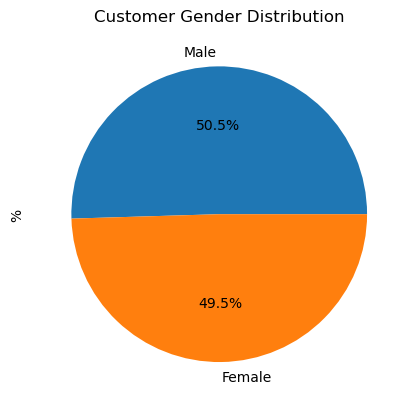

In [9]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax = gender['%'].plot.pie(labels = gender['Gender'], autopct='%.1f%%')
ax.set_title('Customer Gender Distribution')

Next, we take a look at a variable named **Senior Citizen**: Whether the customer is a senior citizen or not.

A senior citizen is an elderly person, especially one who is retired and living on a pension. According to the dataset, only **16.5%** of customers are senior

In [10]:
sen_citizen = df['SeniorCitizen'].value_counts()
sen_citizen = sen_citizen.reset_index()
sen_citizen.columns = ['Senior Citizen', 'Volume']
sen_citizen['%'] = sen_citizen['Volume']/sen_citizen['Volume'].sum()
sen_citizen

,Senior Citizen,Volume,%
0,0,5901,0.837853
1,1,1142,0.162147


Text(0.5, 1.0, 'Senior Citizen Distribution')

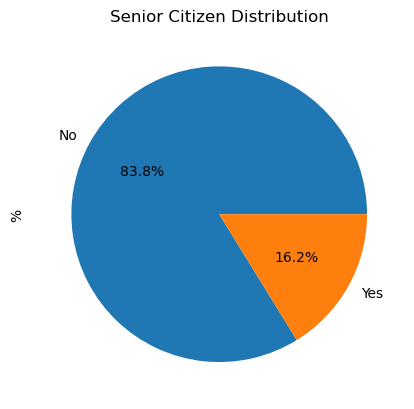

In [11]:
ax = sen_citizen['%'].plot.pie(labels = ['No', 'Yes'], autopct='%.1f%%')
ax.set_title('Senior Citizen Distribution')

The rate of customers with a partner is nearly a half (48.3%).

In [12]:
partner = df['Partner'].value_counts()
partner = partner.reset_index()
partner.columns = ['Partner', 'Volume']
partner['%'] = partner['Volume']/partner['Volume'].sum()
partner

,Partner,Volume,%
0,No,3641,0.516967
1,Yes,3402,0.483033


Text(0.5, 1.0, 'Customer with Partner or Not')

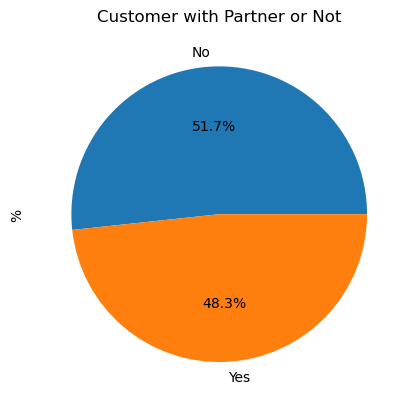

In [13]:
ax = partner['%'].plot.pie(labels = partner['Partner'], autopct='%.1f%%')
ax.set_title('Customer with Partner or Not')

Only 30% of customers have depedents

In [14]:
dependents = df['Dependents'].value_counts()
dependents = dependents.reset_index()
dependents.columns = ['Dependents', 'Volume']
dependents['%'] = dependents['Volume']/dependents['Volume'].sum()
dependents

,Dependents,Volume,%
0,No,4933,0.700412
1,Yes,2110,0.299588


Text(0.5, 1.0, 'Customer with Dependents or Not')

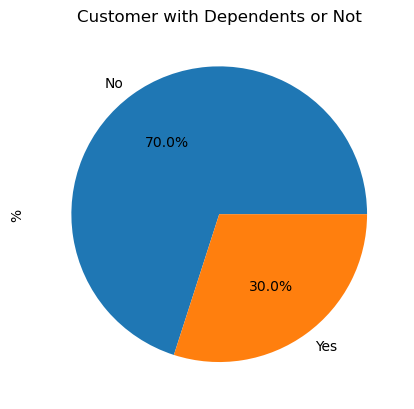

In [15]:
ax = dependents['%'].plot.pie(labels = dependents['Dependents'], autopct='%.1f%%')
ax.set_title('Customer with Dependents or Not')

## 2/ Customer Information

Customer account information: Tenure, Contract, PaperlessBilling, PaymentMethod


In [16]:
# Customer account information: Tenure, Contract, PaperlessBilling, PaymentMethod

**Tenure:** Number of months the customer has stayed with the company

In my opinion, the dataset should be equally distributed between various tenure, which means the histogram should be uniformed.

Text(0.5, 1.0, 'Customers tenure')

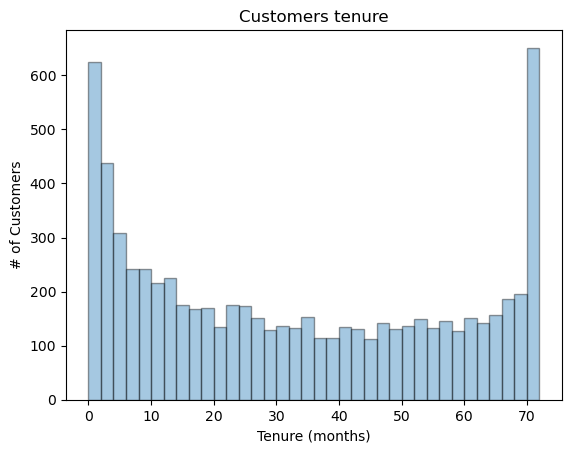

In [17]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}
             )
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers tenure')

When comparing churn and not churn customers by tenure, we can easily see that most of the customers falls into the 1-month tenure category, and the graph is highly skewed.

On the other hand, most not-churn customers have been with the telco company for 72 months (3 years).

Text(0.5, 1.0, 'Not Churn')

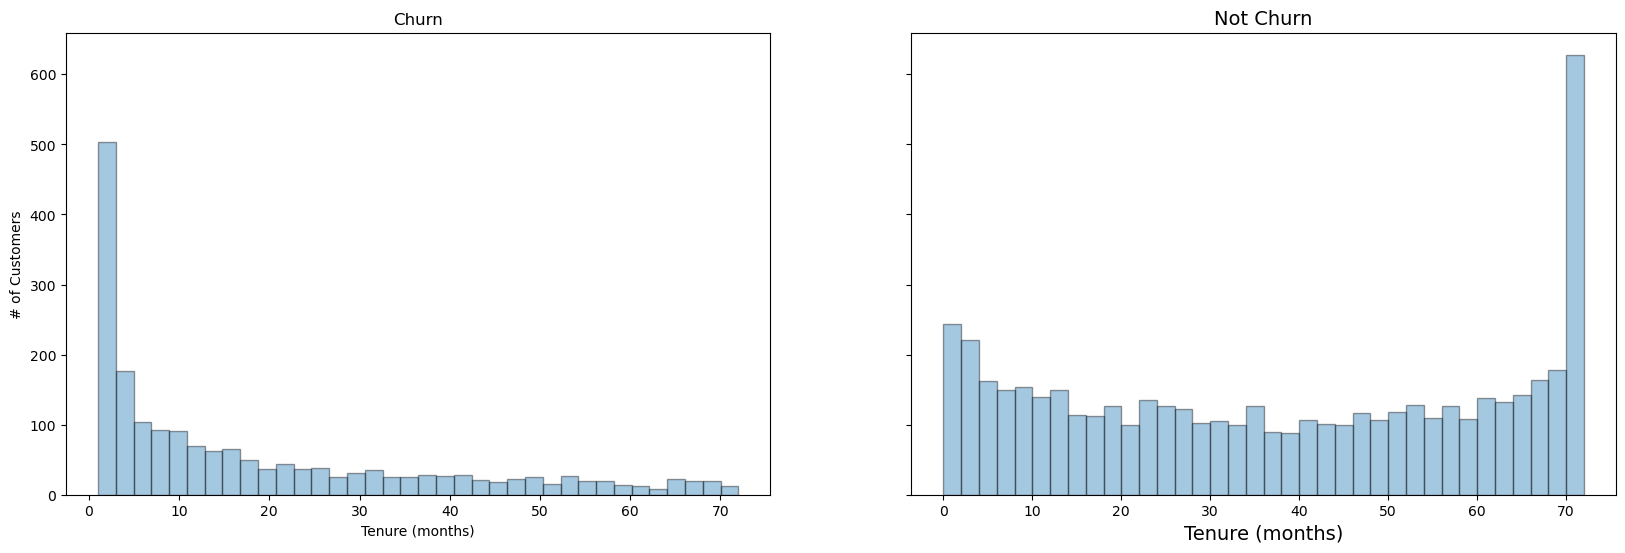

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Churn']=='Yes']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Churn')

ax = sns.distplot(df[df['Churn']=='No']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Not Churn',size = 14)

### Compare tenure and contractype

In [19]:
# Contract
contract = df['Contract'].value_counts()
contract = contract.reset_index()
contract.columns = ['Contract Type', 'Volume']
contract['%'] = contract['Volume']/contract['Volume'].sum()
contract

,Contract Type,Volume,%
0,Month-to-month,3875,0.550192
1,Two year,1695,0.240664
2,One year,1473,0.209144


[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

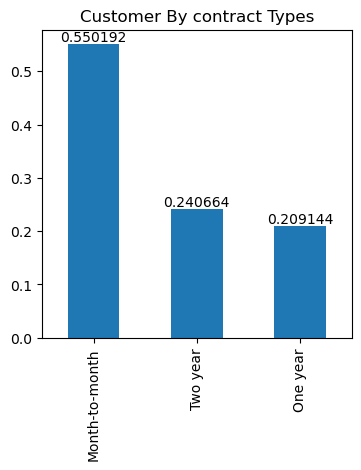

In [20]:
ax = contract['%'].plot(kind='bar',figsize=(4,4))

# ax.set_yticklabels(contract['%'])
ax.set_xticklabels(contract['Contract Type'])

ax.set_title('Customer By contract Types')
ax.bar_label(ax.containers[0], label_type='edge')

Looking at the graph below, we can see that most one-month-tenure customers signed month to month contract, and 72-month-tenure customers mostly fall into two-year contract.

We can have a hypothesis that most churn customers signed month to month contracts.

Text(0.5, 1.0, 'Two Year Contract')

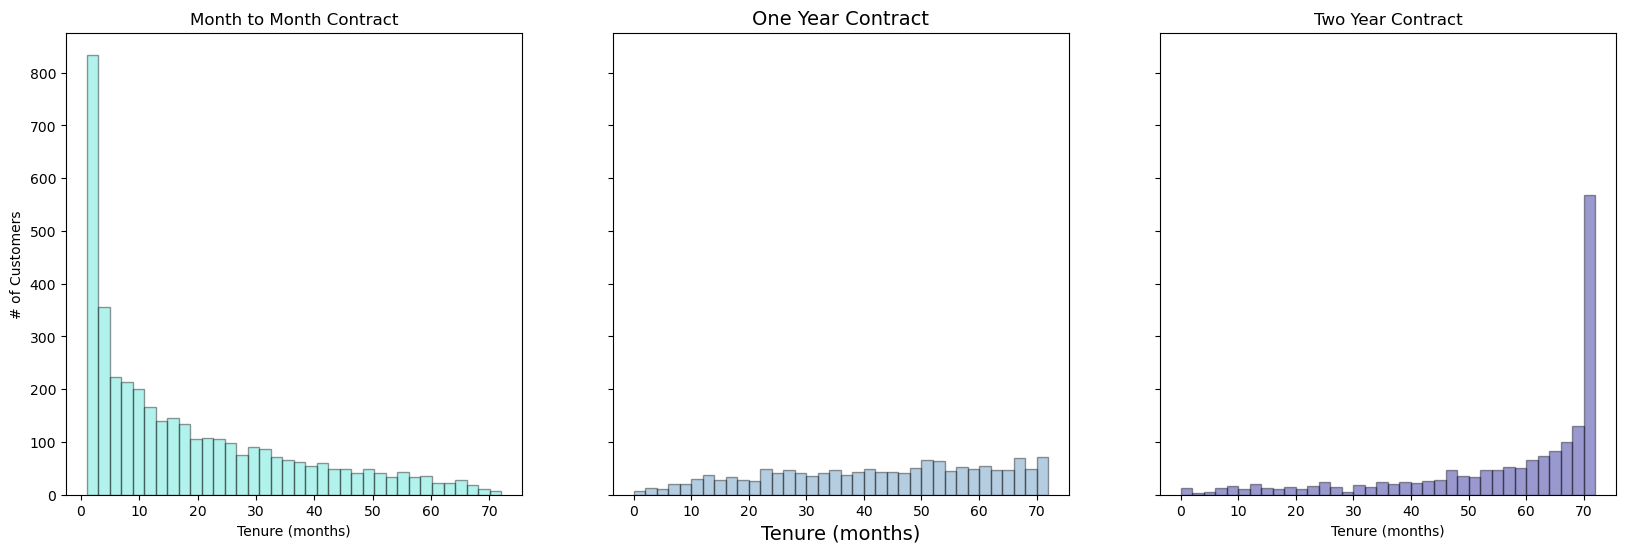

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

## 3/ Telecommunication service type

4 out of 6 services saw 'No' option outweighted the 'Yes' option, except for phone service and Internet service. Therefore, these 2 are the  most popular services chosen by customers.

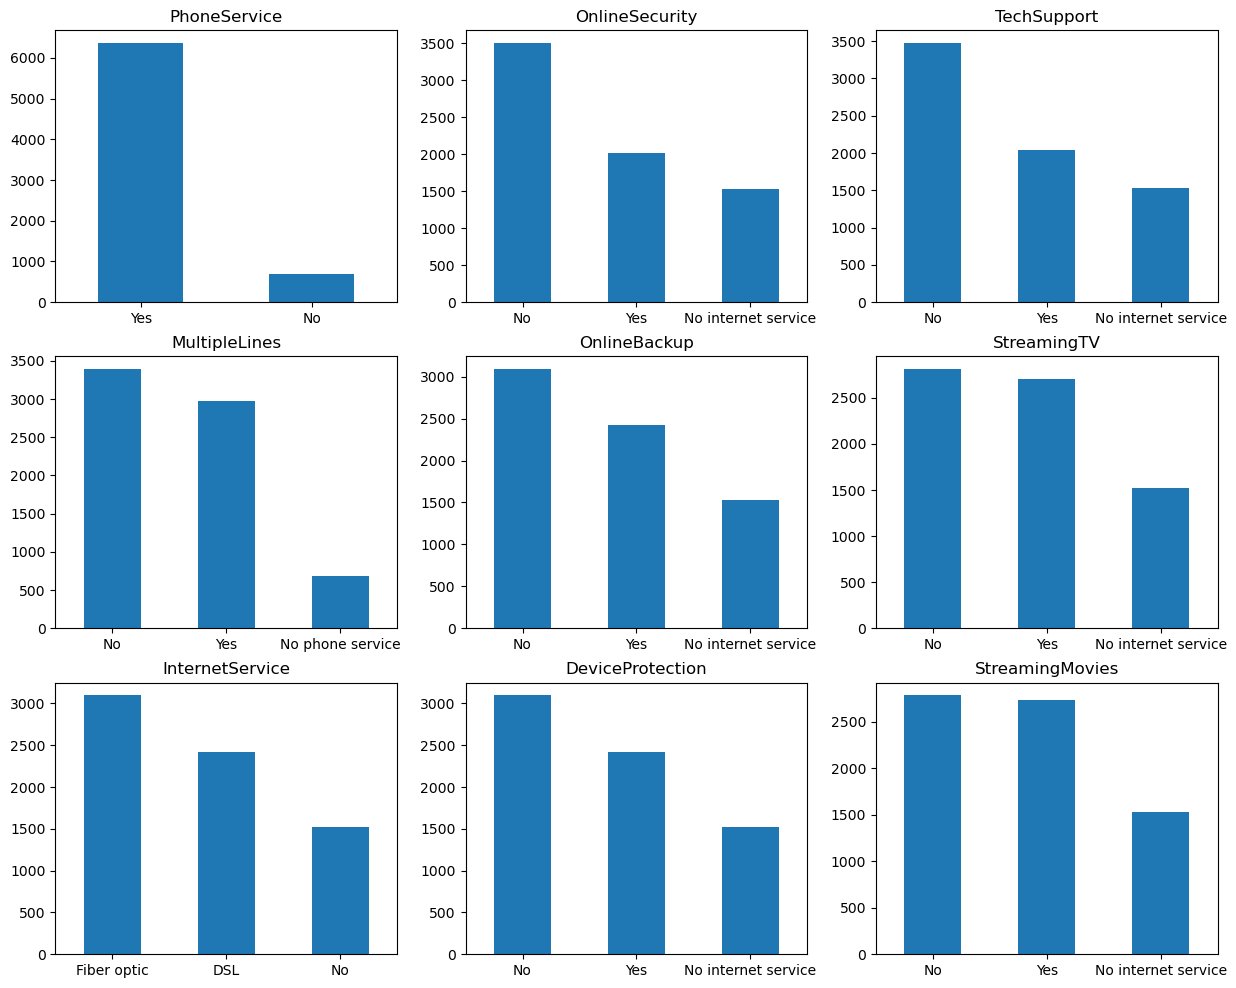

In [22]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)


## 4/ Monthly charge: MonthlyCharges, TotalCharges

Now we take a look at the distribution of the Monthly Charge amount and Total Charge amount.

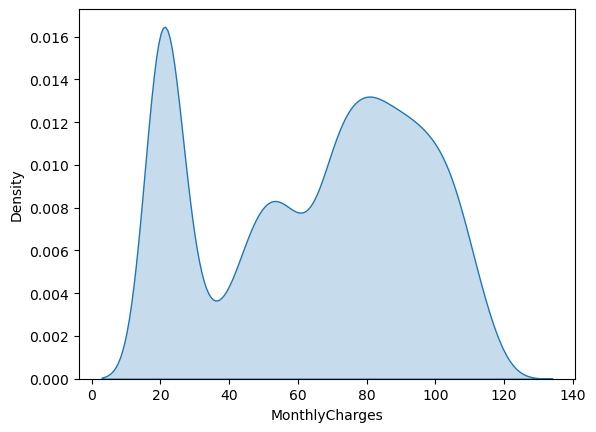

In [23]:
# Monthly charge: MonthlyCharges, TotalCharges

ax = sns.kdeplot(df['MonthlyCharges'], shade = True)

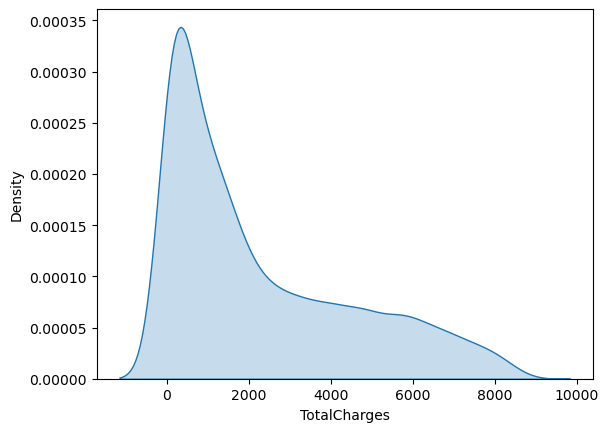

In [24]:
# TotalCharges
df['TotalCharges'].replace(' ', 0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
ax = sns.kdeplot(df['TotalCharges'], shade = True)

Text(0.5, 1.0, 'User Monthly and Total Charges Amount')

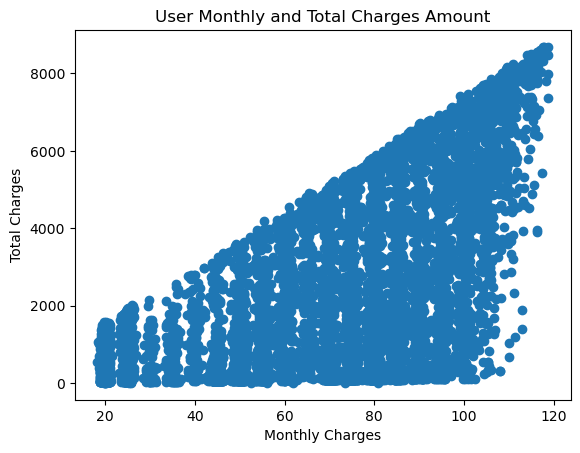

In [25]:
plt.scatter(df['MonthlyCharges'], df['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('User Monthly and Total Charges Amount')

## 5/ Churn correlation

In [26]:
# Contract
churn = df['Churn'].value_counts()
churn = churn.reset_index()
churn.columns = ['Churn', 'Volume']
churn['%'] = churn['Volume']/churn['Volume'].sum()
churn

,Churn,Volume,%
0,No,5174,0.73463
1,Yes,1869,0.26537


The dataset is made up of 27% churn customers, and 73% not churn customers

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

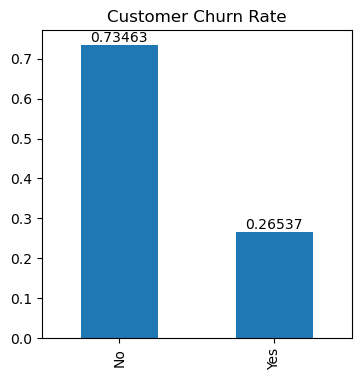

In [27]:
ax = churn['%'].plot(kind='bar',figsize=(4,4))

# ax.set_yticklabels(contract['%'])
ax.set_xticklabels(churn['Churn'])

ax.set_title('Customer Churn Rate')
ax.bar_label(ax.containers[0], label_type='edge')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

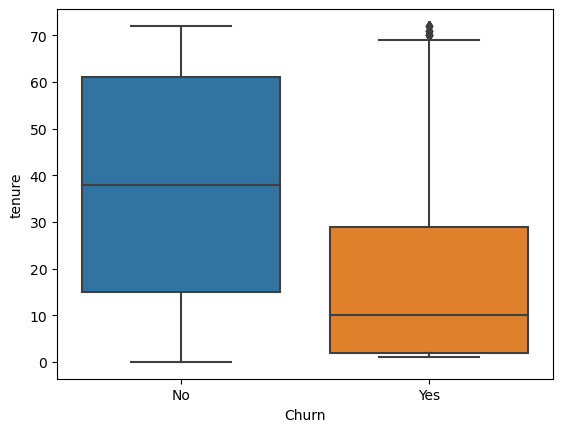

In [28]:
# Churn distribution by tenure

sns.boxplot(x = df.Churn, y = df.tenure)

In [29]:
table = df.pivot_table(index='Contract', columns='Churn', aggfunc='count').iloc[:,1:3]
table.columns = table.columns.get_level_values(1)
table['%Yes'] = 100* table['Yes']/(table['Yes']+table['No'])
table['%No'] = 100* table['No']/(table['Yes']+table['No'])

table['%Yes'] = table['%Yes'].astype(int).astype(str) + '%'
table['%No'] = table['%No'].astype(int).astype(str) + '%'

table

Churn,Yes,No,%Yes,%No
Contract,,,,
Month-to-month,1655,2220,42%,57%
One year,166,1307,11%,88%
Two year,48,1647,2%,97%


As we made a hypothesis before, it is true that most churn customers signed month-to-month contract

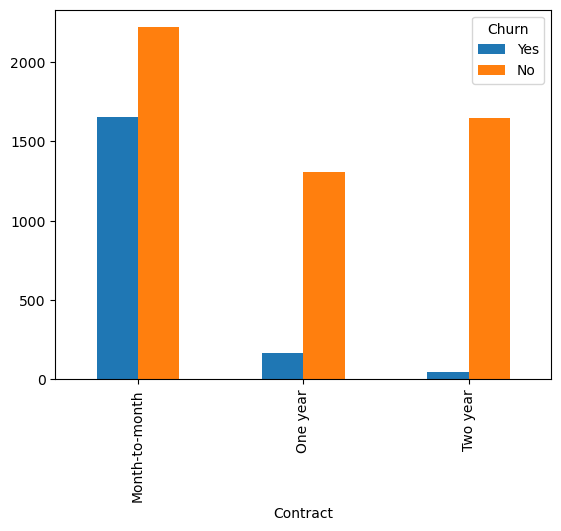

In [30]:
plt = table[['Yes','No']].plot.bar()
plt.labels = table[['%Yes', '%No']]

Customers seem to churn more when monthly charge is higher.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

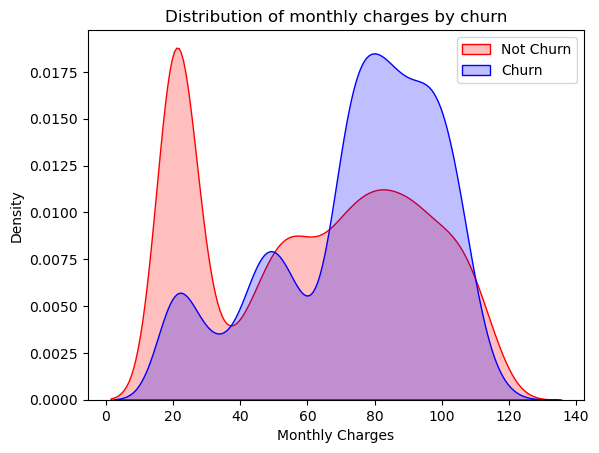

In [31]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"])
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

But customers seem to churn more when total charge is lower. However, the difference is not so significant.

Text(0.5, 1.0, 'Distribution of total charges by churn')

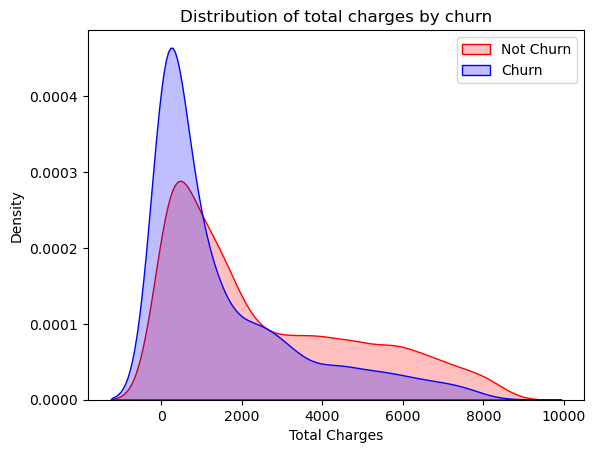

In [32]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"])
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## 5/ Conclusion

- Conclusion: Longer-term contracts will more likely to prevent user from churn. Also, higher monthly charge amount seems to affect more to Churn rate.
- Suggestion: Encourage customers to sign longer-term contracts.